In [20]:
import sys

sys.path.append("/Users/Mike/desktop/UCSB/CS/CS111/cs111-2021-fall/Python") 

import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import networkx as nx
import json
import cs111

import matplotlib
# %matplotlib ipympl
# %matplotlib tk
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
np.set_printoptions(precision = 4)

## Problem 1
#### Part 1

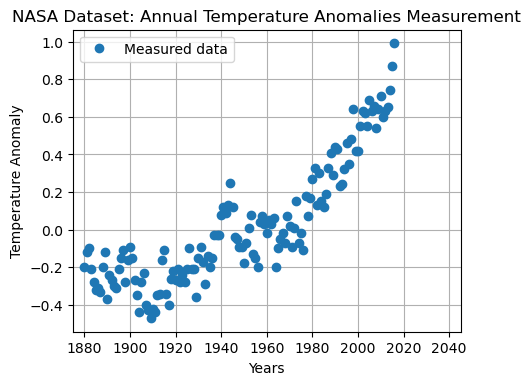

In [21]:
filename = "/Users/Mike/desktop/UCSB/CS/CS111/cs111-2021-fall/Homework/h06/annual_temps.json"
years, temperatures = cs111.get_gistemp(filename)

plt.figure( dpi=100, figsize=(5,4) ) # plot size
plt.plot( years, temperatures, "o", label="Measured data" )
plt.xlabel( "Years" )
plt.ylabel( "Temperature Anomaly" )
plt.title( "NASA Dataset: Annual Temperature Anomalies Measurement" )
plt.grid() # grid lines behind the plot
plt.xlim([1875, 2045]) # shows until year 2040
plt.legend() # displays legend
plt.show() # shows the plot

#### Part 2

In [25]:
# x=[x0, x1], we are using the linear equation
# want the line temperature=x0+x1*years for years 1880-2040
A = np.ones((len(years),2))
A[:,-1] = years
x, res, rank, s = npla.lstsq(A, temperatures, rcond=None)
years1 = np.linspace(1880, 2040, len( range(1880, 2041) ))
AA = np.ones((len(years1),2)) # create the matrix for this range of years
AA[:,-1] = years1
y1 = AA @ x # gives us the temperature estimates
print( "x based off the linear model:\n", x, sep="" )
print( "year 2040 estimate:\n", y1[-1], sep="" )
print("\n\n", AA)

x based off the linear model:
[-1.3912e+01  7.1544e-03]
year 2040 estimate:
0.6825848003434967


 [[1.000e+00 1.880e+03]
 [1.000e+00 1.881e+03]
 [1.000e+00 1.882e+03]
 [1.000e+00 1.883e+03]
 [1.000e+00 1.884e+03]
 [1.000e+00 1.885e+03]
 [1.000e+00 1.886e+03]
 [1.000e+00 1.887e+03]
 [1.000e+00 1.888e+03]
 [1.000e+00 1.889e+03]
 [1.000e+00 1.890e+03]
 [1.000e+00 1.891e+03]
 [1.000e+00 1.892e+03]
 [1.000e+00 1.893e+03]
 [1.000e+00 1.894e+03]
 [1.000e+00 1.895e+03]
 [1.000e+00 1.896e+03]
 [1.000e+00 1.897e+03]
 [1.000e+00 1.898e+03]
 [1.000e+00 1.899e+03]
 [1.000e+00 1.900e+03]
 [1.000e+00 1.901e+03]
 [1.000e+00 1.902e+03]
 [1.000e+00 1.903e+03]
 [1.000e+00 1.904e+03]
 [1.000e+00 1.905e+03]
 [1.000e+00 1.906e+03]
 [1.000e+00 1.907e+03]
 [1.000e+00 1.908e+03]
 [1.000e+00 1.909e+03]
 [1.000e+00 1.910e+03]
 [1.000e+00 1.911e+03]
 [1.000e+00 1.912e+03]
 [1.000e+00 1.913e+03]
 [1.000e+00 1.914e+03]
 [1.000e+00 1.915e+03]
 [1.000e+00 1.916e+03]
 [1.000e+00 1.917e+03]
 [1.000e+00 1.918e+03]
 [1.0

In [44]:
A = np.array( [[1, np.e], [2, np.e**2], [3, np.e**3]] )
print(A)
U, s, Vt = npla.svd(A)
U1, s1, Vt1 = npla.svd(A.T@A)
print((s**2)-s1)

[[ 1.      2.7183]
 [ 2.      7.3891]
 [ 3.     20.0855]]
[-5.6843e-14 -1.0214e-14]


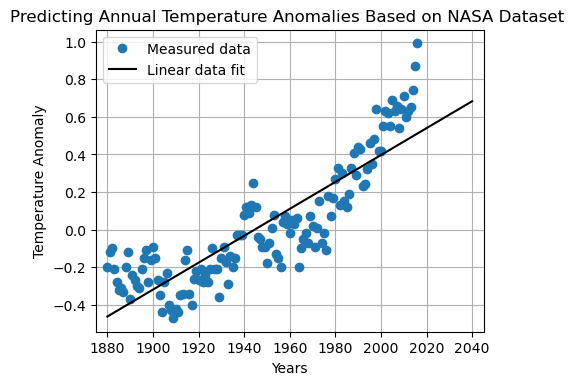

In [315]:
# same plotting procedure as before, but we also add the y = 2x+1 line
plt.figure( dpi=100, figsize=(5,4) )
plt.plot( years, temperatures, "o", label="Measured data" )
plt.plot(years1, y1, 'black', label='Linear data fit')
plt.xlabel( "Years" )
plt.ylabel( "Temperature Anomaly" )
plt.title( "Predicting Annual Temperature Anomalies Based on NASA Dataset " )
plt.grid()
plt.xlim([1875, 2045])
plt.legend()
plt.show()

#### Part 3

In [319]:
# first we save our years and temperatures arrays
# then we use them and modify them as necessary
start_year = 1880
save_years = np.copy(years)
save_temps = np.copy(temperatures)

# for the first graph we work with the original years and
# original temperatures, i.e. the years for data are 1880-2016
A = np.ones((len(years),2))
A[:,-1] = years
x, res, rank, s = npla.lstsq(A, temperatures, rcond=None)

years1 = np.linspace(start_year, 2040, len( range(start_year, 2041) ))
AA = np.ones((len(years1),2)) # create the matrix for this range of years
AA[:,-1] = years1
y = AA @ x # gives us the temperature estimates

print( "\n1880-2016 data produces the following x:\n", x, sep="" )
print( "\nyear 2040 estimate:\n", y[-1], sep="" )


1880-2016 data produces the following x:
[-1.3912e+01  7.1544e-03]

year 2040 estimate:
0.6825848003434967


In [320]:
# for the second graph we modify the years and temp arrays
start_year = 1970
years = np.copy(save_years[start_year-1880:])
temperatures = np.copy(save_temps[start_year-1880:])
# now we can proceed to run the exact same code to obtain the second
# line of estimates
A = np.ones((len(years),2))
A[:,-1] = years
x1, res, rank, s = npla.lstsq(A, temperatures, rcond=None)

years2 = np.linspace(start_year, 2040, len( range(start_year, 2041) ))
AA = np.ones((len(years1),2)) # create the matrix for this range of years
AA[:,-1] = years1
y1 = AA @ x1 # gives us the temperature estimates

print( "\n1970-2016 data produces the following x:\n", x1, sep="" )
print( "\nyear 2040 estimate:\n", y1[-1], sep="" )


1970-2016 data produces the following x:
[-3.5788e+01  1.8149e-02]

year 2040 estimate:
1.2351167900092506


In [321]:
# for the third graph we modify the years and temp arrays again
start_year = 2010
years = np.copy(save_years[start_year-1880:])
temperatures = np.copy(save_temps[start_year-1880:])
# now we can proceed to run the exact same code to obtain the second
# line of estimates
A = np.ones((len(years),2))
A[:,-1] = years
x2, res, rank, s = npla.lstsq(A, temperatures, rcond=None)

years3 = np.linspace(start_year, 2040, len( range(start_year, 2041) ))
AA = np.ones((len(years1),2)) # create the matrix for this range of years
AA[:,-1] = years1
y2 = AA @ x2 # gives us the temperature estimates

print( "\n2010-2016 data produces the following x:\n", x2, sep="" )
print( "\nyear 2040 estimate:\n", y2[-1], sep="" )


2010-2016 data produces the following x:
[-1.0638e+02  5.3214e-02]

year 2040 estimate:
2.178214285713949


In [19]:
# same plotting procedure as before, but we plot all 3 lines
plt.figure( dpi=100, figsize=(5,4) )
plt.plot( save_years, save_temps, "o", label="Measured data" )
plt.plot(years1, y, 'black', label='1880-2016 data')
plt.plot(years1, y1, 'red', label='1970-2016 data')
plt.plot(years1, y2, 'blue', label='2010-2016 data')
plt.xlabel( "Years" )
plt.ylabel( "Temperature Anomaly" )
plt.title( "Predicting Annual Temperature Anomalies Based on NASA Dataset " )
plt.grid()
plt.xlim([1875, 2045])
plt.ylim([-0.6, 2.4])
plt.legend()
plt.show()

NameError: name 'save_years' is not defined

<Figure size 500x400 with 0 Axes>

#### Part 4

In [246]:
# x = [x0, x1, x2], we are using the quadratic equation
# want the line temperature=x0+x1*years+x2*years^2 for years 1880-2040

A = np.ones((len(save_years),3))
A[:,-2] = save_years
A[:,-1] = save_years**2
x_quad, res, rank, s = npla.lstsq(A, save_temps, rcond=None)

# second matrix goes until year 2040
AA = np.ones((len(years1),3))
AA[:,-2] = years1
AA[:,-1] = years1**2
y_quad = AA @ x_quad

print( "\nx based off the quadratic model:\n", x_quad, sep="" )
print( "\nyear 2040 estimate:\n", y_quad[-1], sep="" )


x based off the quadratic model:
[ 2.9612e+02 -3.1128e-01  8.1734e-05]

year 2040 estimate:
1.2465514884599997


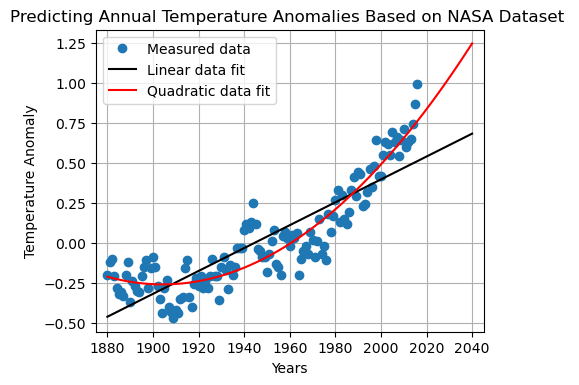

In [247]:
# same plot procedure, add the quadratic line, omit 1.3 lines
plt.figure( dpi=100, figsize=(5,4) )
plt.plot( save_years, save_temps, "o", label="Measured data" )
plt.plot( years1, y, 'black', label='Linear data fit' )
plt.plot( years1, y_quad, 'red', label='Quadratic data fit' )
plt.xlabel( "Years" )
plt.ylabel( "Temperature Anomaly" )
plt.title( "Predicting Annual Temperature Anomalies Based on NASA Dataset " )
plt.grid()
plt.xlim([1875, 2045])
plt.legend()
plt.show()

## Problem 2

In [11]:
A = np.array( [[1,0], [0,1000]] )
cs111.print_float64(npla.cond(A))
print("condition number of A is", npla.cond(A))
print("Is k(A)=1000?", npla.cond(A)==1000.0)
print("\n\n")
B = np.array( [[1,0], [1,0]] )
cs111.print_float64(npla.cond(B))
print("condition number of B is", npla.cond(B))
print("is the condition number of B infinite?", npla.cond(B)==np.inf)

input     : 1000.0
as float64: 1.0000000000000000e+03
as hex    : 408f400000000000
sign      : 0 means +
exponent  : 408 means 1032 - 1023 = 9
mantissa  : 1.1111010000000000000000000000000000000000000000000000

condition number of A is 1000.0
Is k(A)=1000? True



input     : inf
as float64: inf
as hex    : 7ff0000000000000
sign      : 0 means +
exponent  : 7ff means inf or nan

condition number of B is inf
is the condition number of B infinite? True


## Problem 3
#### Part 1 - Machine $\epsilon$

In [57]:
machine_epsilon = 2**(-52) # this is the arithmetic expression
print(1 + machine_epsilon / 2 > 1) # quick check

cs111.print_float64(machine_epsilon) # get the 16-bit hex representation
print("How close is machine epsilon to 10^-16?\n", np.absolute(machine_epsilon - 10e-16)/machine_epsilon)

False
input     : 2.220446049250313e-16
as float64: 2.2204460492503131e-16
as hex    : 3cb0000000000000
sign      : 0 means +
exponent  : 3cb means 971 - 1023 = -52
mantissa  : 1.0000000000000000000000000000000000000000000000000000

How close is machine epsilon to 10^-16?
 3.5035996273704963


#### Part 2 - $\frac{\textbf{1}}{\textbf{machine }\epsilon}$

In [252]:
inv_machine_epsilon = 1 / machine_epsilon
cs111.print_float64(inv_machine_epsilon)

input     : 4503599627370496.0
as float64: 4.5035996273704960e+15
as hex    : 4330000000000000
sign      : 0 means +
exponent  : 433 means 1075 - 1023 = 52
mantissa  : 1.0000000000000000000000000000000000000000000000000000



#### Part 3 - Largest Positive Non-Infinite Number

In [4]:
def return_largest_num(num_of_bits, exponent_bits, frac_bits):
    machine_epsilon = num_of_bits**(-1.0 * frac_bits)
    x = (num_of_bits ** (num_of_bits**(exponent_bits - 1) - 1)) * (num_of_bits - machine_epsilon)
    print("Machine epsilon for this system:", machine_epsilon, "\n")
    cs111.print_float64(x)
    return x

x = return_largest_num(2.0, 11.0, 52.0) #IEEE 64-bit standard
print(x * 2.0 == np.inf)

Machine epsilon for this system: 2.220446049250313e-16 

input     : 1.7976931348623157e+308
as float64: 1.7976931348623157e+308
as hex    : 7fefffffffffffff
sign      : 0 means +
exponent  : 7fe means 2046 - 1023 = 1023
mantissa  : 1.1111111111111111111111111111111111111111111111111111

True


#### Part 4 - $\epsilon^{10}$

In [267]:
# consider the following:
x = machine_epsilon**10
cs111.print_float64(x) # yes, this should be an exact representation in IEEE

input     : 2.913414348125081e-157
as float64: 2.9134143481250808e-157
as hex    : 1f70000000000000
sign      : 0 means +
exponent  : 1f7 means 503 - 1023 = -520
mantissa  : 1.0000000000000000000000000000000000000000000000000000



#### Part 5 - How Many Numbers?

In [307]:
def f(lower, upper):
    num_of_points = int(cs111.double_to_hex(np.float64(upper)),16) - int(cs111.double_to_hex(np.float64(lower)),16)
    print(num_of_points)
    print(math.log(num_of_points,2))
print("num of floating points between 1 and 2: ")
f(1,2)
print("num of floating points between 4096 and 8192: ")
f(4096,8192)
print("num of floating points between 1/64 and 1/32: ")
f(1/64,1/32)

num of floating points between 1 and 2: 
4503599627370496
52.0
num of floating points between 4096 and 8192: 
4503599627370496
52.0
num of floating points between 1/64 and 1/32: 
4503599627370496
52.0


## Problem 4
#### Part 2

In [72]:
# float 16 machine epsilon
e_16 = 2**(-10)
x_16 = (2**15)*(1 + (1 - e_16))
cs111.print_float64(x_16)
cs111.print_float64(np.float16(1 + x_16))

# bfloat machine epsilon
e_bfloat = 2**(-7)
x_bfloat = (2**15)*(1 + (1 - e_bfloat))
cs111.print_float64(x_bfloat)

input     : 65504.0
as float64: 6.5504000000000000e+04
as hex    : 40effc0000000000
sign      : 0 means +
exponent  : 40e means 1038 - 1023 = 15
mantissa  : 1.1111111111000000000000000000000000000000000000000000

input     : 65500.0
as float64: 6.5504000000000000e+04
as hex    : 40effc0000000000
sign      : 0 means +
exponent  : 40e means 1038 - 1023 = 15
mantissa  : 1.1111111111000000000000000000000000000000000000000000

input     : 65280.0
as float64: 6.5280000000000000e+04
as hex    : 40efe00000000000
sign      : 0 means +
exponent  : 40e means 1038 - 1023 = 15
mantissa  : 1.1111111000000000000000000000000000000000000000000000



In [6]:
def return_largest_num(num_of_bits, exponent_bits, frac_bits):
    machine_epsilon = num_of_bits**(-1.0 * frac_bits)
    x = (num_of_bits ** (num_of_bits**(exponent_bits - 1) - 1)) * (num_of_bits - machine_epsilon)
    print("Machine epsilon for this system:", machine_epsilon, "\n")
    cs111.print_float64(x)
    return x

In [9]:
return_largest_num(2.0, 5.0, 10.0) #IEEE 16-bit standard
return_largest_num(2.0, 5.0, 10.0) #IEEE 64-bit standard
return_largest_num(2.0, 8.0, 7.0) #bfloat 16-bit standard

Machine epsilon for this system: 0.0009765625 

input     : 65504.0
as float64: 6.5504000000000000e+04
as hex    : 40effc0000000000
sign      : 0 means +
exponent  : 40e means 1038 - 1023 = 15
mantissa  : 1.1111111111000000000000000000000000000000000000000000

Machine epsilon for this system: 0.0009765625 

input     : 65504.0
as float64: 6.5504000000000000e+04
as hex    : 40effc0000000000
sign      : 0 means +
exponent  : 40e means 1038 - 1023 = 15
mantissa  : 1.1111111111000000000000000000000000000000000000000000

Machine epsilon for this system: 0.0078125 

input     : 3.3895313892515355e+38
as float64: 3.3895313892515355e+38
as hex    : 47efe00000000000
sign      : 0 means +
exponent  : 47e means 1150 - 1023 = 127
mantissa  : 1.1111111000000000000000000000000000000000000000000000



3.3895313892515355e+38